Multi-Line Chart

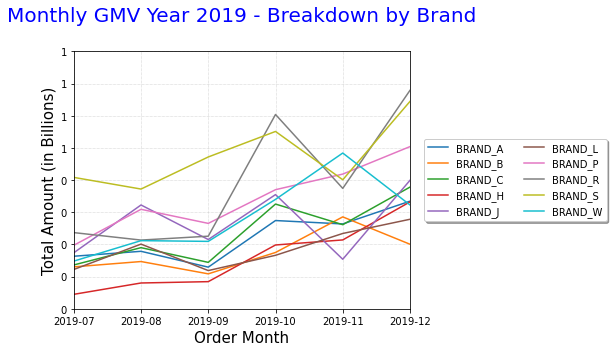

In [2]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

1. Atur komponen legend menggunakan function plt.legend() 
2. loc: untuk menentukan posisi legend, upper left, upper right, lower right left, upper lower left right center, center, best
3. bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
4. shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
5. ncol: jumlah kolom dari isi legend, defaultnya adalah 1

<Figure size 432x288 with 0 Axes>

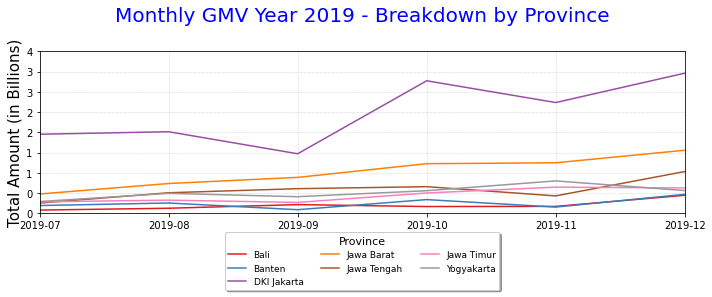

In [3]:
#Mode-2
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

*) function plot() ditambahkan parameter cmap (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah ‘Set1’, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


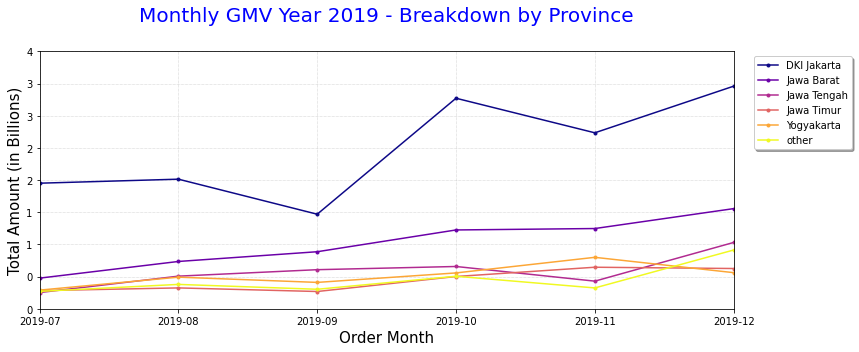

In [4]:
#Ambil lima provinsi dgn GMV tertinggi provinsi yg lainya ganti dengan other
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

*) Membuat annotate/anotasi pada gram
Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)

arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset, seperti :

1). arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.

2). connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.

3). color: menentukan warna dari panah

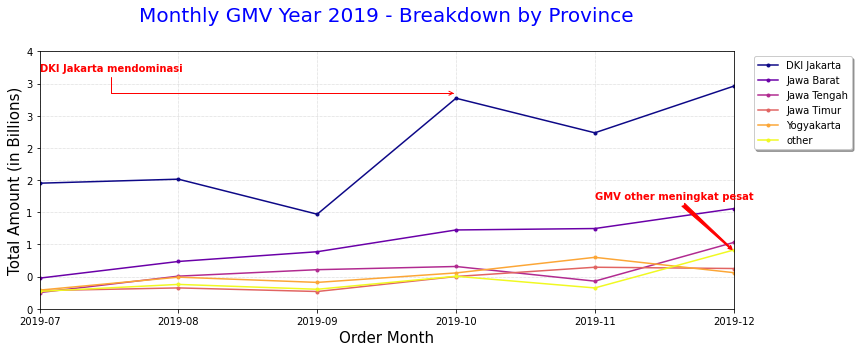

In [5]:
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
            xytext=(4, 1700000000), weight='bold', color='red',
            arrowprops=dict(arrowstyle='fancy',
                            connectionstyle="arc3",
                            color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
            xytext=(0, 3700000000), weight='bold', color='red',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="angle",
                            color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Dgn data yg signifikan di jakarta pada blan oktober, maka saya mncari insight kmbali di provinsi jakarta dari bulan oktober-desember

In [6]:
#membuat variabel baru utk memfokuskan mencari insight di jakarta pda bulan 2019-10 sampai 2019-12
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month']>= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


*)Membuat visualisasi dgn pie chart
dengan masukkan datanya ke function plt.pie().

Beberapa parameter yang bisa dimodifikasi:

labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.

colors: array yang berisikan warna untuk masing-masing bagian pie.

autopct: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.

shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.

radius: jari-jari dari pie-chart

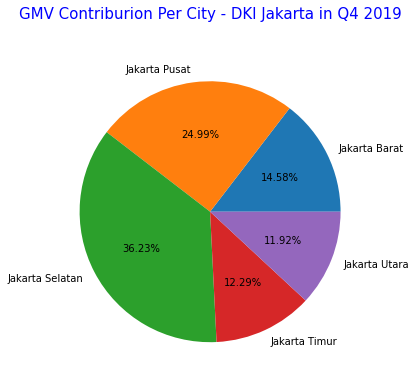

In [7]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contriburion Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15, color='blue')
plt.show()

*) autopct='%1.2f%%' artinya mmbuat persentase di dalam chart per seratus, jika autopct='%1.3f%%' artinya per seribu persen

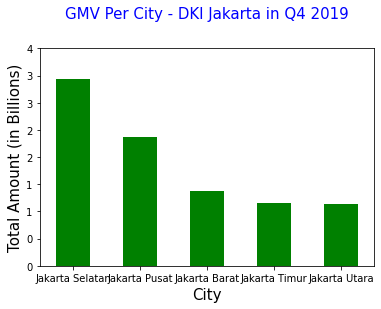

In [8]:
#visualisasi menggunakan bar chart
#sintaks hampir mirip dengan line chart hanya tinggal mengubah jenisnya menjadi bar

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

*) parameter rotation di plt.xtick() untuk memutar label di sumbu-x.

*) jika ingin barchart-nya horizontal, maka bisa mengganti parameternya menjadi kind='barh', dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y nya.

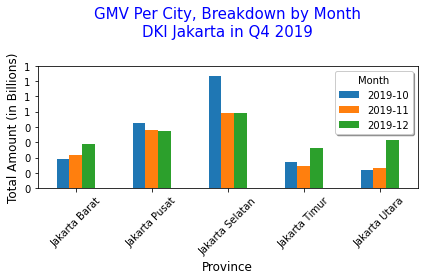

In [9]:
#multichart bar
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

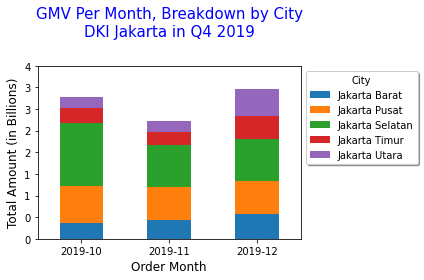

In [10]:
#stacked chart
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

*) Dari kedua chart tersebut, kita sama-sama bisa melihat pola bahwa kebanyakan GMV turun dari bulan Oktober ke November, tetapi lalu naik pesat di bulan Desember. Untuk di Jakarta Barat, GMV November justru naik dari Oktober. Sedangkan di Jakarta Selatan, GMV Desember justru lebih kecil daripada GMV Oktober

In [11]:
#membuat agrerat data customer utk melihat pola customer di DKI Jakarta
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders', ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


*) Di sini menggunakan function agg untuk melakukan agregasi data. Data agregat per customer yang diambil yaitu jumlah orders (banyaknya unique order_id), total quantity, dan total GMV.

Lalu didapatkan 711 customers yang bertransaksi di DKI Jakarta pada Q4 2020.

Jika diurutkan dari jumlah order terbanyak, bisa dilihat bahwa customer_id 12748 telah melakukan 29 transaksi dengan jumlah quantity mencapai 557, dan GMV lebih dari 175 Juta! 

Dengan insight baru ini sya akan mmbuat histogram,
menggunakan function plt.hist dan memasukkan variabel yang ingin dicek. Parameter lain yang bisa ditambahkan yaitu:

1). bins: jumlah bin (kelompok nilai) yang diinginkan

2). range: nilai minimum dan maksimum yang ditampilkan

3). orientation: ‘horizontal’ atau ‘vertikal’

4). color: warna bar di histogram

<Figure size 432x288 with 0 Axes>

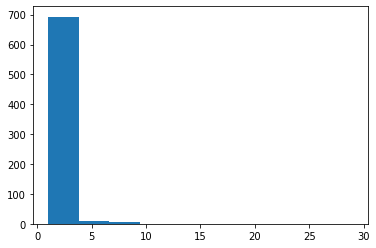

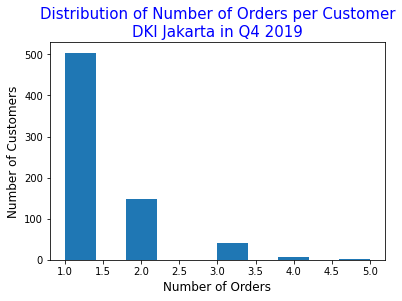

In [12]:
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

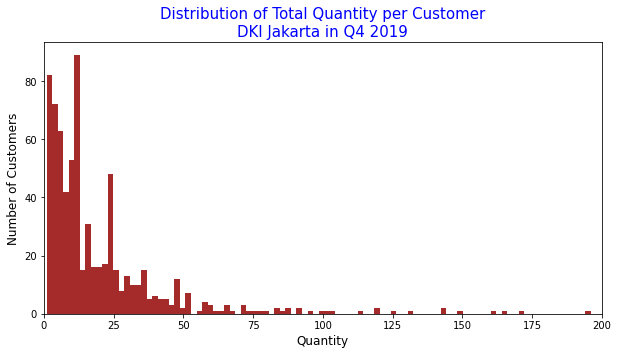

In [13]:
#histogram quantity
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

*) menormalisasi ticks label di sumbu-x karena angka yang menunjukkan GMV bisa jadi terlalu panjang.

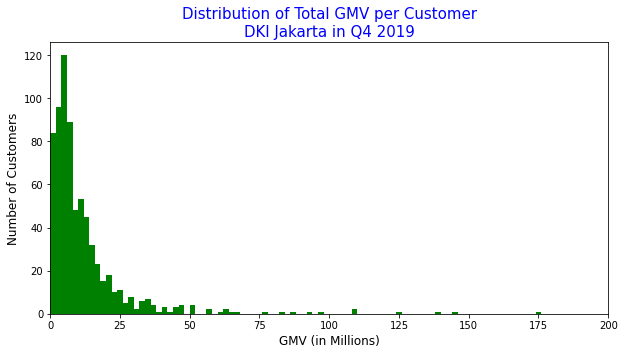

In [14]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1, 200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

*) terlihat jumlah customer sudah terlihat jelas range nialinya, dan grafiknya condong ke kiri

#membuat grafik dengn scatterplot
Untuk membuat scatterplot, aku perlu menggunakan function plt.scatter dengan memasukkan variabel-variabel yang akan dibuat scatterplot.

<Figure size 432x288 with 0 Axes>

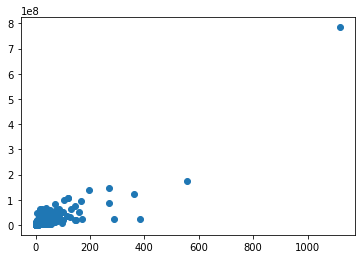

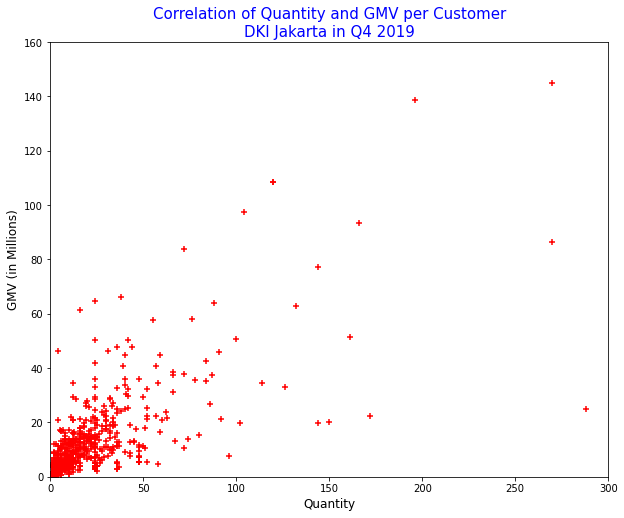

In [15]:
plt.clf()
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)', fontsize = 12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

*) semakin jelas bahwa quantity dan GMV itu berkorelasi positif. Jadi jika suatu customer telah membeli dengan banyak quantity, maka kemungkinan GMV dari dia juga semakin besar.

#KET 
1. membuat multi line-chart yang dapat digunakan untuk melihat komparasi dari GMV dari berbagai provinsi, dari bulan ke bulan.

2. menghasilkan pie chart atau multi bar-chart untuk melihat komposisi GMV per kota.

3. untuk melihat distribusi GMV atau quantity, kita bisa gunakan histogram.

4. membuat scatterplot yang bisa memperlihatkan relasi antara quantity dan GMV.

#CASE 1
Analisis untuk top brands di bulan Desember 2019,

variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019.

In [16]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


#CASE 2

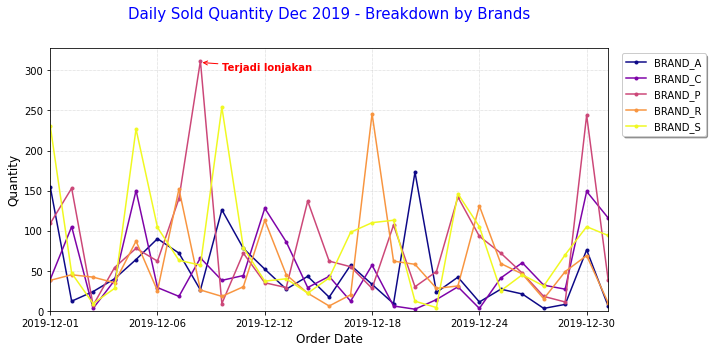

In [17]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

*) visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain)

#CASE 3

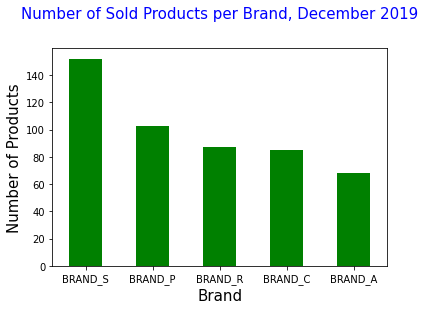

In [18]:
#Mencari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019.
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

#CASE 4

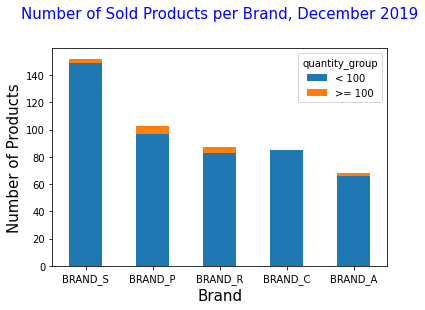

In [19]:
#analisis untuk top brands di bulan Desember 2019
#breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019

#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

#CASE 5
Membuat histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya)

utk melihat bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal

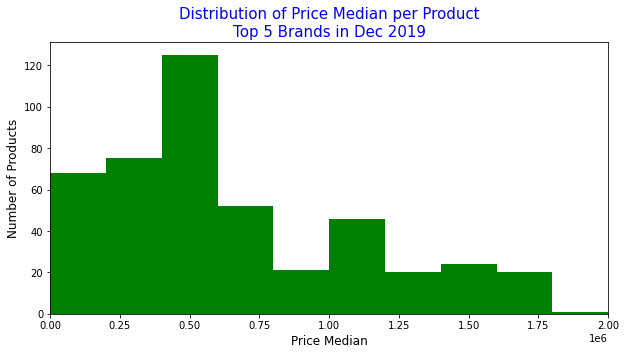

In [20]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

#CASE 6
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

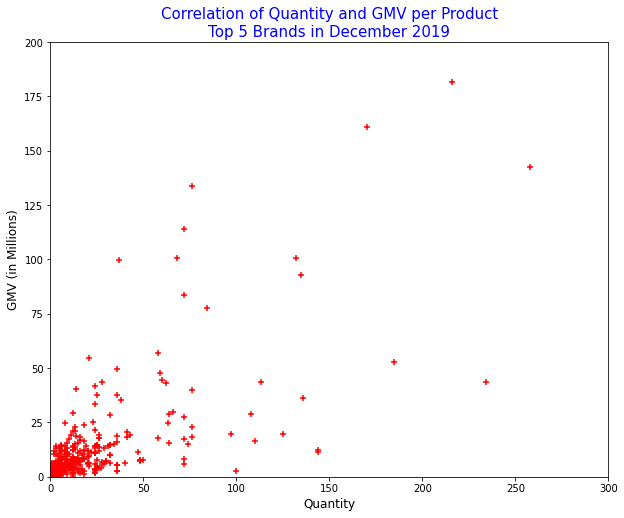

In [21]:
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

#CASE 7
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV
median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

<Figure size 432x288 with 0 Axes>

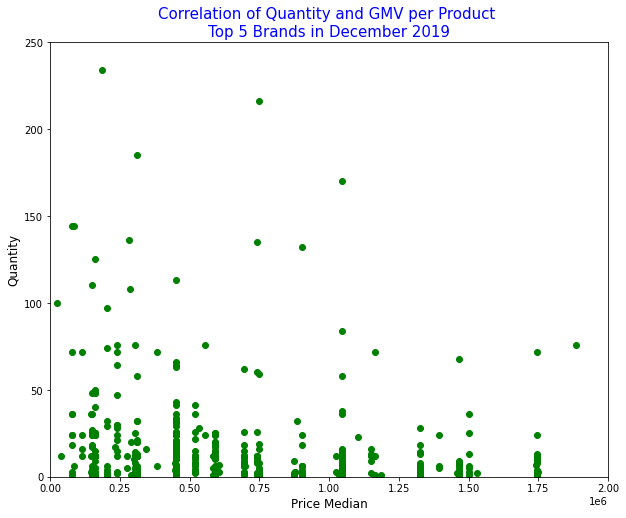

In [22]:
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product \nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()